**1. (15%) Chapter 6, exercise 2**

---

**a. P(VOMITING = true)**
<pre>
P = 6 / 10 = <b>0.6</b>
</pre>

---

**b. P(HEADACHE = false)**
<pre>
P = 3 / 10 = <b>0.3</b>
</pre>

---

**c. P(HEADACHE = true, VOMITING = false)**
<pre>
P = 1 / 10 = <b>0.1</b>
</pre>

---

**d. P(VOMITING = false | HEADACHE = true)**
<pre>
P = P(HEADACHE = true | VOMITING = false) * P(VOMITING = false) / P(HEADACHE = true)
  =  (1 / 4) * (4 / 10) / (7 / 10) = <b>1 / 7</b>
</pre>

---

**e. P(MENINGITIS | FEVER = true, VOMITING = false)**
<pre>
P = (P(FEVER = true | MENINGITIS) * P(VOMITING = false | MENINGITIS)) * P(MENINGITIS) / P(FEVER = true, VOMITING = false)

Components:
C1: P(FEVER = true, VOMITING = false) = (d<sub>1</sub>, d<sub>2</sub>, d<sub>5</sub>, d<sub>9</sub>) / 10      = 4 / 10
C2: P(MENINGITIS = true)                                          = 3 / 10
C3: P(MENINGITIS = false)                                         = 7 / 10
C4: P(FEVER = true | MENINGITIS = true)                           = 1 / 3
C5: P(FEVER = true | MENINGITIS = false)                          = 3 / 7
C6: P(VOMITING = false | MENINGITIS = true)                       = 2 / 3
C7: P(VOMITING = false | MENINGITIS = false)                      = 4 / 7

<b>P(MENINGITIS = true | FEVER = true, VOMITING = false)</b>
= (C4 * C6) * C2 / C1 = ((1 / 3) * (2 / 3)) * (3 / 10) / (4 / 10) = <b>0.167 (3 sig. fig.)</b>

<b>P(MENINGITIS = false | FEVER = true, VOMITING = false)</b>
= (C5 * C7) * C3 / C1 = ((3 / 7) * (4 / 7)) * (7 / 10) / (4 / 10) = <b>0.429 (3 sig. fig.)</b>
</pre>

**2. (15%) Chapter 6, exercise 3**

---

**a. Create a naive Bayes model that uses probability density functions to model the descriptive features in this dataset (assume that all the descriptive features are normally distributed).**

<pre>
naive Bayes model
= arg max((P(SS-IN|STATUS) * P(SED-IN|STATUS) * P(COND-IN|STATUS) * P(SS-OUT|STATUS) * P(SED-OUT|STATUS) * P(COND-OUT|STATUS)) * P(STATUS))
             SS-IN        SED-IN      COND-IN       SS-OUT      SED-OUT      COND-OUT
= arg max((N(x, μ, σ) * N(x, μ, σ) * N(x, μ, σ) * N(x, μ, σ) * N(x, μ, σ) * N(x, μ, σ)) * P(STATUS))

P(STATUS = ok)      = 4 / 13
P(STATUS = settler) = 5 / 13
P(STATUS = solids)  = 4 / 13

STATUS = ok
        |    μ    |      σ      |
SS-IN   |     189 | 45.41659021 |
SED-IN  |   3.125 |        0.25 |
COND-IN |  1860.5 | 371.4022976 |
SS-OUT  |      18 | 6.055300708 |
SED-OUT |   0.054 |0.09740294315|
COND-OUT|    2036 | 532.1910684 |

STATUS = settler
        |    μ    |      σ      |
SS-IN   |   200.8 | 55.12893977 |
SED-IN  |     4.4 | 1.781852968 |
COND-IN |  1251.2 | 116.2441396 |
SS-OUT  |      98 | 23.37733946 |
SED-OUT |   1.018 | 1.526636826 |
COND-OUT|    1372 | 142.5780488 |

STATUS = solids
        |    μ    |      σ      |
SS-IN   |    1301 | 55.12893977 |
SED-IN  |    32.5 | 11.95826074 |
COND-IN |    1621 | 453.0378939 |
SS-OUT  |    49.1 | 37.75588254 |
SED-OUT |    1293 | 430.9508866 |
COND-OUT|  832.85 | 958.3122334 |
</pre>
---

**b. What prediction will the naive Bayes model return for the following query?**

**SS-IN = 222, SED-IN = 4.5, COND-IN = 1,518, SS-OUT = 74 SED-OUT = 0.25, COND-OUT = 1,642**

<pre>
<b>STATUS = ok</b>
SS-IN    = (((1 / 45.41659021 * sqrt(2π) * e<sup>(222 - 189)<sup>2</sup> / 2 * (45.41659021)<sup>2</sup></sup>)))       = 0.00675 (3 sig. fig.)
SED-IN   = (((1 / 0.25 * sqrt(2π) * e<sup>(4.5 - 3.125)<sup>2</sup> / 2 * (0.25)<sup>2</sup></sup>)))                  = 4.307 * 10<sup>-7</sup> (3 sig. fig.)
COND-IN  = (((1 / 371.4022976 * sqrt(2π) * e<sup>(1518 - 1860.5)<sup>2</sup> / 2 * (371.4022976)<sup>2</sup></sup>)))    = 7.021 * 10<sup>-4</sup> (3 sig. fig.)
SS-OUT   = (((1 / 6.055300708 * sqrt(2π) * e<sup>(74 - 18)<sup>2</sup> / 2 * (6.055300708)<sup>2</sup></sup>)))         = 1.765 * 10<sup>-20</sup> (3 sig. fig.)
SED-OUT  = (((1 / 0.09740294315 * sqrt(2π) * e<sup>(0.25 - 0.054)<sup>2</sup> / 2 * (0.09740294315)<sup>2</sup></sup>))) = 0.541 (3 sig. fig.)
COND-OUT = (((1 / 532.1910684 * sqrt(2π) * e<sup>(1642 - 2036)<sup>2</sup> / 2 * (532.1910684)<sup>2</sup></sup>)))      = 5.699 * 10<sup>-4</sup> (3 sig. fig.)

P(STATUS = ok | SS-IN, SED-IN, COND-IN, SS-OUT, SED-OUT, COND-OUT) =
(0.00675 * (4.307 * 10<sup>-7</sup>) * (7.021 * 10<sup>-4</sup>) * (1.765 * 10<sup>-20</sup>) * 0.541 * (5.699 * 10<sup>-4</sup>)) * (4 / 13)= <b>3.416 * 10<sup>-36</sup> (3 sig. fig.)</b>

<b>STATUS = settler</b>
SS-IN    = (((1 / 55.12893977 * sqrt(2π) * e<sup>(222 - 200.8)<sup>2</sup> / 2 * (55.12893977)<sup>2</sup></sup>)))  = 0.00672 (3 sig. fig.)
SED-IN   = (((1 / 1.781852968 * sqrt(2π) * e<sup>(4.5 - 4.4)<sup>2</sup> / 2 * (1.781852968)<sup>2</sup></sup>)))    = 0.224 (3 sig. fig.)
COND-IN  = (((1 / 116.2441396 * sqrt(2π) * e<sup>(1518 - 1251.2)<sup>2</sup> / 2 * (116.2441396)<sup>2</sup></sup>))) = 2.464 * 10<sup>-4</sup> (3 sig. fig.)
SS-OUT   = (((1 / 23.37733946 * sqrt(2π) * e<sup>(74 - 98)<sup>2</sup> / 2 * (23.37733946)<sup>2</sup></sup>)))      = 0.0101 (3 sig. fig.)
SED-OUT  = (((1 / 1.526636826 * sqrt(2π) * e<sup>(0.25 - 1.018)<sup>2</sup> / 2 * (1.526636826)<sup>2</sup></sup>)))  = 0.230 (3 sig. fig.)
COND-OUT = (((1 / 142.5780488 * sqrt(2π) * e<sup>(1642 - 1372)<sup>2</sup> / 2 * (142.5780488)<sup>2</sup></sup>)))   = 4.657 * 10<sup>-4</sup> (3 sig. fig.)

P(STATUS = settler | SS-IN, SED-IN, COND-IN, SS-OUT, SED-OUT, COND-OUT) =
(0.00672 * 0.224 * (2.464 * 10<sup>-4</sup>) * 0.0101 * 0.230 * (4.657 * 10<sup>-4</sup>)) * (5 / 13)= <b>1.538 * 10<sup>-13</sup> (3 sig. fig.)</b>

<b>STATUS = solids</b>
SS-IN    = (((1 / 485.4400066 * sqrt(2π) * e<sup>(222 - 1301)<sup>2</sup> / 2 * (485.4400066)<sup>2</sup></sup>)))   = 6.950 * 10<sup>-5</sup> (3 sig. fig.)
SED-IN   = (((1 / 16.01903522 * sqrt(2π) * e<sup>(4.5 - 32.5)<sup>2</sup> / 2 * (16.01903522)<sup>2</sup></sup>)))   = 0.00215 (3 sig. fig.)
COND-IN  = (((1 / 116.2441396 * sqrt(2π) * e<sup>(1518 - 1621)<sup>2</sup> / 2 * (116.2441396)<sup>2</sup></sup>)))  = 8.581 * 10<sup>-4</sup> (3 sig. fig.)
SS-OUT   = (((1 / 23.37733946 * sqrt(2π) * e<sup>(74 - 98)<sup>2</sup> / 2 * (23.37733946)<sup>2</sup></sup>)))     = 0.00850 (3 sig. fig.)
SED-OUT  = (((1 / 1.526636826 * sqrt(2π) * e<sup>(0.25 - 1.018)<sup>2</sup> / 2 * (1.526636826)<sup>2</sup></sup>))) = 1.0291 * 10<sup>-5</sup> (3 sig. fig.)
COND-OUT = (((1 / 142.5780488 * sqrt(2π) * e<sup>(1642 - 1372)<sup>2</sup> / 2 * (142.5780488)<sup>2</sup></sup>)))  = 2.915 * 10<sup>-4</sup> (3 sig. fig.)

P(STATUS = settler | SS-IN, SED-IN, COND-IN, SS-OUT, SED-OUT, COND-OUT) =
(0.00672 * 0.224 * (2.464 * 10<sup>-4</sup>) * 0.0101 * 0.230 * (4.657 * 10<sup>-4</sup>)) * (5 / 13)= <b>1.00668 * 10<sup>-21</sup> (3 sig. fig.)</b>
</pre>

Since the model gets the max from all the result and the max of them all comes from settler, the prediction of the query will be **STATUS = settler**.

**3. (15%) Chapter 6, exercise 4**

---

**a. Define the topology of a Bayesian network that encodes these causal relationships.**

In the network, [storm] is the root of network because it directly affects both [burglar] and [cat]. Then both [burglar] and [cat] affect [alarm], so [alarm] is the child node of both of them.

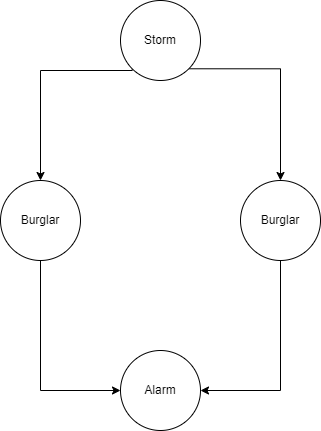

---

**b. The table below lists a set of instances from the house alarm domain. Using the data in this table, create the conditional probability tables (CPTs) for the network you created in part (a) of this question.**

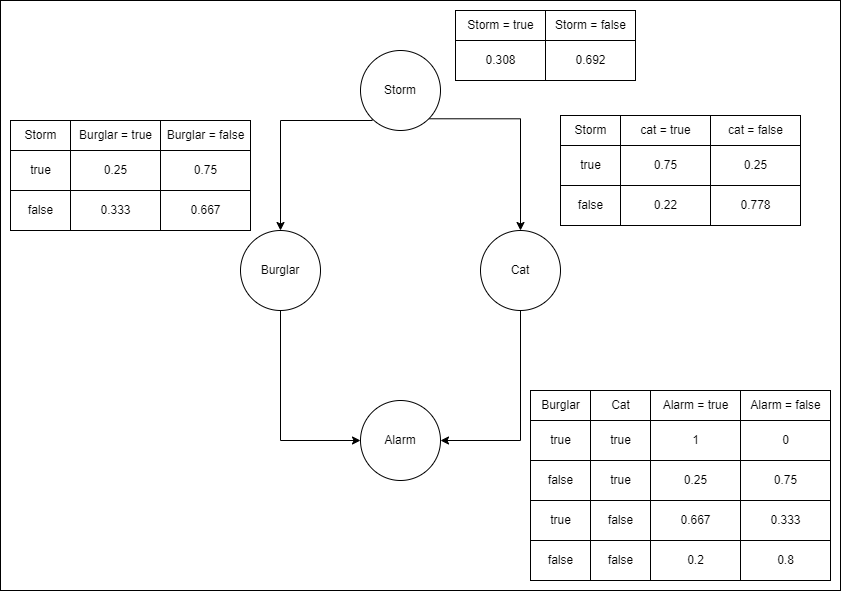

---

**c. What value will the Bayesian network predict for ALARM given that there is both a burglar and a cat in the house but there is no storm.**

Because both the parent nodes for [Alarm], [Burglar] and [Cat], are known, the
probability distribution for [Alarm] is independent of the [Storm] feature. Therefore, we can read the relevant probability distribution for [Alarm] directly from [Alarm] node. Based on that distribution, the prediction will be **[Alarm] = true.**

---

**d. What value will the Bayesian network predict for ALARM given that there is a storm but we don’t know if a burglar has broken in or where the cat is?**

<pre>
Assume [Alarm] = true
P(Alarm = true| Storm = true, Burglar, Cat) =
((P(Alarm = true | Burglar = true, Cat = true) * P(Burglar = true | Storm = true) * P(Cat = true | Storm = true) * P(Storm = true)) +
  (P(Alarm = true | Burglar = true, Cat = false) * P(Burglar = true | Storm = true) * P(Cat = false | Storm = true) * P(Storm = true)) +
  (P(Alarm = true | Burglar = false, Cat = false) * P(Burglar = false | Storm = true) * P(Cat = false | Storm = true) * P(Storm = true)) +
  (P(Alarm = true | Burglar = false, Cat = true) * P(Burglar = false | Storm = true) * P(Cat = true | Storm = true) * P(Storm = true))) / 
  P(Storm = true) =
((1 * 0.25 * 0.75 * 0.308) + (0.667 * 0.25 * 0.25 * 0.308) + (0.2 * 0.75 * 0.25 * 0.308) + (0.25 * 0.75 * 0.75 * 0.308)) / 0.308 =
<b>0.407 (3 sig. fig.)</b>
</pre>

Based on the calculation, [Alarm] = true has a probability = 0.125. In reverse, [Alarm] = false will be (1 - 0.407) = 0.593. Since [Alarm] = false has a higher probability, the network will predict **the alarm will not sound** when there is a storm without knowing if there is a burglar or a cat.

**4. (15%) Chapter 6, exercise 5**

---

**a. Using equal-frequency binning transform the AGE feature into a categorical feature with three levels: young, middle-aged, mature.**

<pre>
Sorting age: 18 (ID = 9), 19 (ID = 6), 21 (ID = 3), 43 (ID = 1), 47 (ID = 4), 49 (ID = 7), 51 (ID = 8), 55 (ID = 5), 57 (ID = 2)

young      : 18 (ID = 9), 19 (ID = 6), 21 (ID = 3)
middle-aged: 43 (ID = 1), 47 (ID = 4), 49 (ID = 7)
mature     : 51 (ID = 8), 55 (ID = 5), 57 (ID = 2)
</pre>

---

**b. Examine the descriptive features in the dataset and list the features that you would exclude before you would use the dataset to build a predictive model. For each feature you decide to exclude explain why you have made this decision.**

For [OCCUPATION], there are as many classes as the number of rows. Therefore, this column suffers the curse of dimensionality and it will not contribute any effect to the target feature. Other than that, [GENDER] and [POLICY TYPE] are categorial features and have low numbers of classes. Therefore, they provide more effective classification. [AGE], although is a continous feature, we can convert it into a categorical feature. For instance, from a), that is a way to convert [AGE] into a categorical feature. As a result, [OCCPATION] will be excluded before we use the dataset.

---

**c. Calculate the probabilities required by a naive Bayes model to represent this domain.**

<pre>
P(PREF CHANNEL = email) = 4 / 9
P(GENDER = male | PREF CHANNEL = email) = 3 / 4
P(GENDER = female | PREF CHANNEL = email) = 1 / 4
P(AGE = young | PREF CHANNEL = email) = 1 / 2
P(AGE = middle-aged | PREF CHANNEL = email) = 1 / 4
P(AGE = mature | PREF CHANNEL = email) = 1 / 4
P(POLICY TYPE = planA | PREF CHANNEL = email) = 1 / 2
P(POLICY TYPE = planB | PREF CHANNEL = email) = 1 / 4
P(POLICY TYPE = planC | PREF CHANNEL = email) = 1 / 4

P(PREF CHANNEL = phone) = 5 / 9
P(GENDER = male | PREF CHANNEL = phone) = 2 / 5
P(GENDER = female | PREF CHANNEL = phone) = 3 / 5
P(AGE = young | PREF CHANNEL = phone) = 1 / 5
P(AGE = middle-aged | PREF CHANNEL = phone) = 2 / 5
P(AGE = mature | PREF CHANNEL = phone) = 2 / 5
P(POLICY TYPE = planA | PREF CHANNEL = phone) = 1 / 5
P(POLICY TYPE = planB | PREF CHANNEL = phone) = 2 / 5
P(POLICY TYPE = planC | PREF CHANNEL = phone) = 3 / 5
</pre>

---

**d. What target level will a naive Bayes model predict for the following query:**

**GENDER = female, AGE = 30, POLICY = planA**

<pre>
Since [AGE] = 30 is closer to the *young* bin, we will convert the query to [AGE] = young

Assume PREF CHANNEL = email
P(PREF CHANNEL = email| GENDER = female, AGE = young, POLICY = planA)
= (
    P(GENDER = female | PREF CHANNEL = email) *
    P(AGE = young | PREF CHANNEL = email) *
    P(POLICY = planA | PREF CHANNEL = email)
  ) * P(PREF CHANNEL = email)
= ((1 / 4) * (1 / 2) * (1 / 2)) * (4 / 9) = 1 / 36

Assume PREF CHANNEL = phone
P(PREF CHANNEL = phone| GENDER = female, AGE = young, POLICY = planA)
= (
    P(GENDER = female | PREF CHANNEL = phone) *
    P(AGE = young | PREF CHANNEL = phone) *
    P(POLICY = planA | PREF CHANNEL = phone)
  ) * P(PREF CHANNEL = phone)
= ((3 / 5) * (1 / 5) * (1 / 5)) * (5 / 9) = 1 / 75
</pre>

Since [PREF CHANNEL] = email returns a higher probability, the prediction of the model says the preferred contact channel is **email**.

**5. (15%) Chapter 6, exercise 6**

---

**a. What target level will a naive Bayes model predict for the following query document: “machine learning is fun”?**

<pre>
The prediction using the naive Bayes model should be represented like this:
P(Document type | query)

The require probabilities:
P(Document type = Entertainment) = 700 / 1000 = 0.7
P(Document type = Education) = 300 / 1000 = 0.3

P(fun | Document type = Entertainment) = 415 / 700 = 0.593 (3 sig. fig.)
P(is | Document type = Entertainment) = 695 / 700 = 0.993 (3 sig. fig.)
P(machine | Document type = Entertainment) = 35 / 700 = 0.05
P(christmas | Document type = Entertainment) = 0 / 700 = 0
P(family | Document type = Entertainment) = 400 / 700 = 0.571 (3 sig. fig.)
P(learning | Document type = Entertainment) = 70 / 700 = 0.1

P(fun | Document type = Education) = 200 / 300 = 0.667 (3 sig. fig.)
P(is | Document type = Education) = 295 / 300 = 0.983 (3 sig. fig.)
P(machine | Document type = Education) = 120 / 300 = 0.4 (3 sig. fig.)
P(christmas | Document type = Education) = 0 / 300 = 0
P(family | Document type = Education) = 10 / 300 = 0.0333 (3 sig. fig.)
P(learning | Document type = Education) = 105 / 300 = 0.35

Assume the document type is Entertainment
P(Document type = Entertainment| query)
= (
    P(machine | Document type = Entertainment),
    P(learning | Document type = Entertainment),
    P(is | Document type = Entertainment),
    P(fun | Document type = Entertainment)
  ) * P(Document type = Entertainment)
= (0.05 * 0.1 * 0.993 * 0.593) * (0.7) = 0.00206 (3 sig. fig.)

Assume the document type is Education
P(Document type = Education| query)
= (
    P(machine | Document type = Education),
    P(learning | Document type = Education),
    P(is | Document type = Education),
    P(fun | Document type = Education)
  ) * P(Document type = Education)
= (0.4 * 0.35 * 0.983 * 0.667) * (0.3) = 0.0275 (3 sig. fig.)
</pre>

Since the naive Bayes model gets the max, **the model predicts the query to be education.**

---

**b. What target level will a naive Bayes model predict for the following query document: “christmas family fun”?**

<pre>
Assume the document type is Entertainment
P(Document type = Entertainment| query)
= (
    P(christmas | Document type = Entertainment),
    P(family | Document type = Entertainment),
    P(fun | Document type = Entertainment)
  ) * P(Document type = Entertainment)
= (0 * 0.571 * 0.593) * (0.7) = 0

Assume the document type is Education
P(Document type = Education| query)
= (
    P(christmas | Document type = Education),
    P(family | Document type = Education),
    P(fun | Document type = Education)
  ) * P(Document type = Education)
= (0 * 0.0333 * 0.667) * (0.3) = 0
</pre>

Based on the computation, because both results return 0, the model cannot return any prediction for this query.

---

**c. What target level will a naive Bayes model predict for the query document in part (b) of this question, if Laplace smoothing with k = 10 and a vocabulary size of 6 is used?**

<pre>
The likelihood formula for laplace smoothing is
P(query | Document type = x) = (count(query | Document type = x) + k) / (count(query | Document type) + (k * abs(Domain(query))))
where x is the types of document (Entertainment, Education), and domain means the distinct count of the parameter. In this case, it is given by the statement where the vocabulary size is 6. Therefore, after modification, the formula looks like this 
P(query | Document type = x) = (count(query | Document type = x) + 6) / (count(query | Document type) + (6 * 6))

count(christmas | Document type) = 0
count(family | Document type) = 410
count(fun | Document type) = 615

count(christmas | Document type = Entertainment) = 0
P(christmas | Document type = Entertainment) = (0 + 10) / (0 + (10 * 6)) = 1 / 6
count(family | Document type = Entertainment) = 400
P(christmas | Document type = Entertainment) = (400 + 10) / (410 + (10 * 6)) = 0.872 (3 sig. fig.)
count(fun | Document type = Entertainment) = 415
P(christmas | Document type = Entertainment) = (415 + 10) / (615 + (10 * 6)) = 0.630 (3 sig. fig.)
P(Document type = Entertainment | query) = ((1 / 60) * 0.872 * 0.630) * (0.7) = 0.0640 (3 sig. fig.)

count(christmas | Document type = Education) = 0
P(christmas | Document type = Education) = (0 + 10) / (0 + (10 * 6)) = 1 / 6
count(family | Document type = Education) = 10
P(christmas | Document type = Education) = (10 + 10) / (410 + (10 * 6)) = 0.0426 (3 sig. fig.)
count(fun | Document type = Education) = 200
P(christmas | Document type = Education) = (200 + 10) / (615 + (10 * 6)) = 0.311 (3 sig. fig.)
P(Document type = Education | query) = ((1 / 6) * 0.0359 * 0.316) * (0.3) = 2.206 * 10<sup>-3</sup> (3 sig. fig.)
</pre>

Based on the computation, the result for [Document type] = Entertainment returns a higher value, **the model predict the query is an entertainment document.**

**6. (25%, coding assignment) See file NaiveBayse_MNIST_Problems.**

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
#from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [ ]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
from sklearn.datasets import load_digits
mnist = load_digits()
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1540:], Y[1540:]
dev_data, dev_labels = X[1400:1540], Y[1400:1540]
train_data, train_labels = X[:1400], Y[:1400]
mini_train_data, mini_train_labels = X[:200], Y[:200]


data shape:  (1797, 64)
label shape: (1797,)


### A. Create a 10x10 grid to visualize 10 examples of each digit.

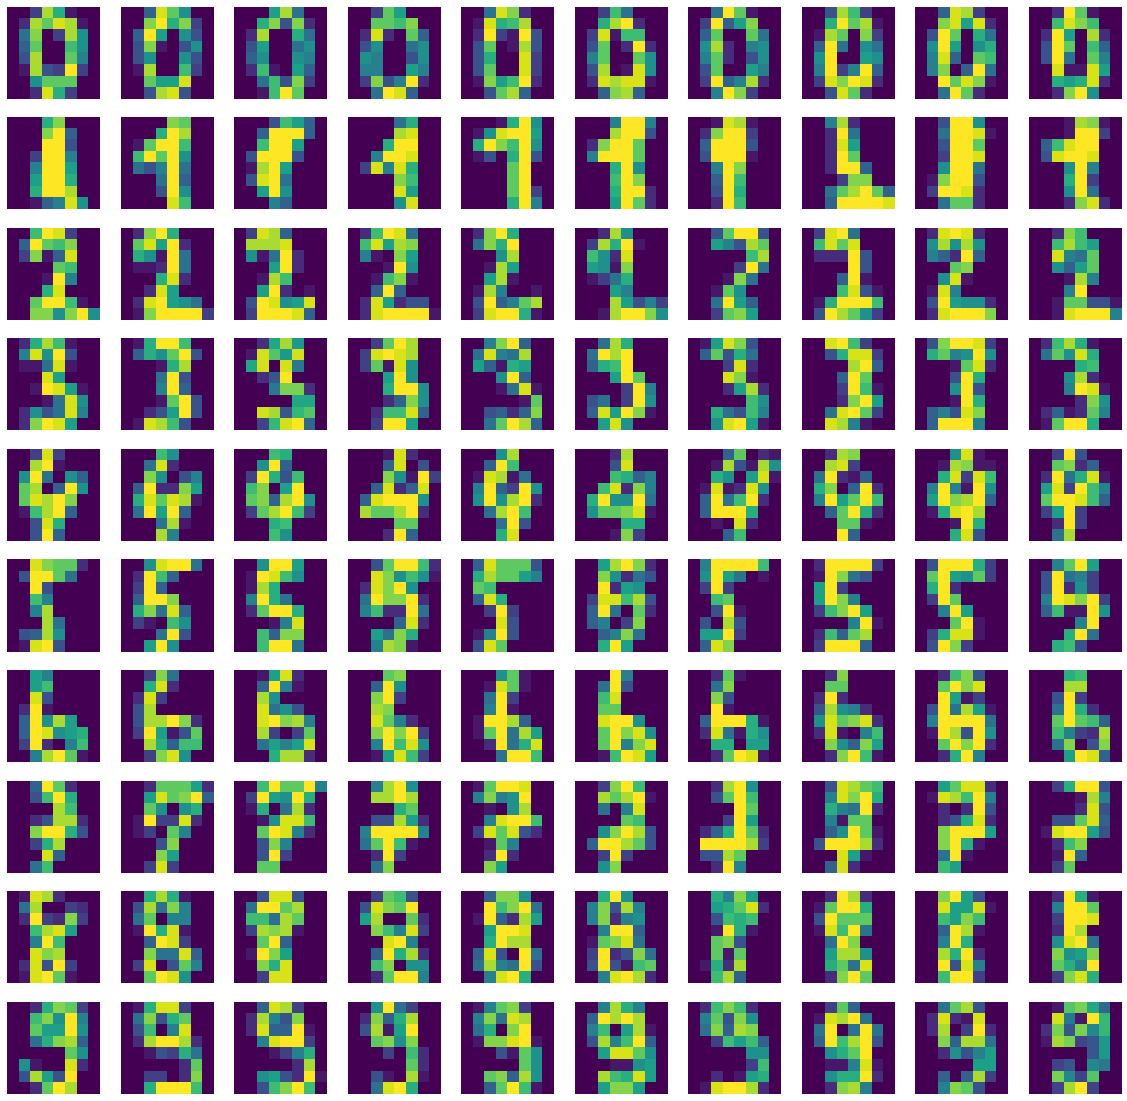

In [ ]:
# Collect 10 examples for each digit
digits = np.unique(mini_train_labels)

fig, axs = plt.subplots(len(digits), 10, figsize=(20,20))

for i, d in enumerate(digits):
    for j in range(10):
        axs[i, j].imshow(mini_train_data[mini_train_labels == d][j].reshape((8, 8)))
        axs[i, j].axis('off')

### B.  Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?
### Note, the answers may vary depending on what thresholds you set.

In [ ]:
import pandas as pd
from sklearn.preprocessing import binarize, MinMaxScaler

def convert(v, classes):
  cl = len(classes)
  for i in range(cl):
    if v <= ((1 + i) / cl):
      o = classes[i]
      break
  return o

def cont_to_class(data, cl=3):
  scaler = MinMaxScaler()
  scaler.fit(data)
  res = scaler.transform(data)
  res = pd.DataFrame(res)
  cols = res.columns
  classes = [i for i in range(cl)]
  for c in cols:
    res[c] = res[c].apply(lambda v: convert(v, classes))
  return res

dev_data_binarized = binarize(dev_data)
test_data_binarized = binarize(test_data)
bnb = BernoulliNB()
y_pred = bnb.fit(dev_data_binarized, dev_labels).predict(test_data_binarized)
print("Bernoulli accuracy : %f" % (accuracy_score(y_pred, test_labels)))

dev_data_3_classes = cont_to_class(dev_data)
test_data_3_classes = cont_to_class(test_data)
mnb = MultinomialNB()
y_pred = mnb.fit(dev_data_3_classes, dev_labels).predict(test_data_3_classes)
print("Multinomial accuracy : %f" % (accuracy_score(y_pred, test_labels)))

Bernoulli accuracy : 0.836576
Multinomial accuracy : 0.856031


The multi-class version improves the results. Although the improvment is not much, the 3 class variables conversion might train the model with not only the shape of the integer, but also the shadow around the integer. From the above grids, we can see that each example has the shape and the outline of the integer. The outline in this case might be the reason that gives the multinominal NB a slight edge over the binary model.

### C. Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(dev_data, dev_labels).predict(test_data)
print("Gaussian accuracy : %f" % (accuracy_score(y_pred, test_labels)))

Gaussian accuracy : 0.704280


Typically, when using continuous numbers for NB, it requires the use of probability density function. In the above case, where the gaussian formula is used, might not be suitable for the distribution of the dataset because the weight that is given to each subsequent value in the training could potentially messed up the prediction.

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(train_data, train_labels).predict(test_data)
print("Gaussian accuracy : %f" % (accuracy_score(y_pred, test_labels)))

Gaussian accuracy : 0.821012


With a bigger training dataset, the performance of Gaussian NB classifer improves significantly, but it still underperform compared to Bernoulli with binary variables and Multinominal with 3 variables, where they both trained with a smaller portion of data. The conclusion we can make from these observation is that when encountering real number features, naive Bayes model is not the best option for machine learning.